# Statistical Significance

Slides [aquí](https://docs.google.com/presentation/d/10jV-CsgaaGv2F7H_gZnkz5_eVyVmqKLrc1rf26e2aDY/edit#slide=id.p1)

In [20]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [21]:
# typically I prefer to import everything up top...
# but for this we're just going to do some of our more generic
# ones for you to fill in more specific ones on your own
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

## Warm Up! 🥵

### 🥵#1

* How do we evaluate scedasticity and why is it important to make sure this assumption is met in linear modeling?
  * What even is scedasticity? `________________`
  * Do we want to have homoscedasticity or heteroscedasticity `________________`
  * In the below cell... plot `X` with `y1` and `X` with `y2`.  Which one do you think is homoscedastic? heteroscedastic? `________________`
  * What about something more formal than this eyeball test?  Why is this eyeball test not great to start relying on?

In [22]:
# set seed for reproducible random stuff
np.random.seed(42)

n = 100
X = np.arange(n)
y1 = X + np.random.normal(0, 10, size=n)
y2 = X + np.random.normal(0, X ** 0.75)

<IPython.core.display.Javascript object>

In [7]:
# plot X with y1 and X with y2


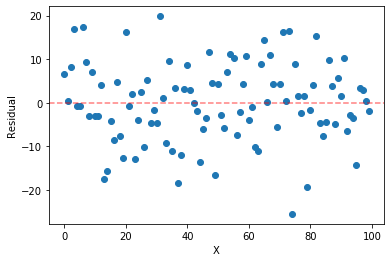

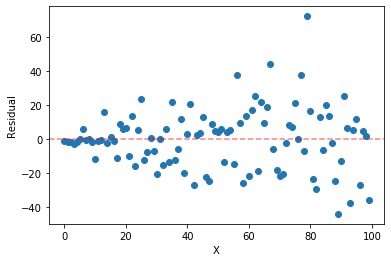

Reject the null that residuals are homoscedastic for y1? False
Reject the null that residuals are homoscedastic for y2? True


<IPython.core.display.Javascript object>

In [23]:
# What about something more formal than this eyeball test?
X_const = sm.add_constant(X)
lm1 = sm.OLS(y1, X_const).fit()
lm2 = sm.OLS(y2, X_const).fit()

plt.scatter(X, lm1.resid)
plt.axhline(0, c="red", ls="--", alpha=0.5)
plt.xlabel("X")
plt.ylabel("Residual")
plt.show()

plt.scatter(X, lm2.resid)
plt.axhline(0, c="red", ls="--", alpha=0.5)
plt.xlabel("X")
plt.ylabel("Residual")
plt.show()

# Documenation: https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_breuschpagan.html
# Null hypothesis is homoscedastic
_, _, _, p1 = sms.het_breuschpagan(lm1.resid, X_const)
_, _, _, p2 = sms.het_breuschpagan(lm2.resid, X_const)

print(f"Reject the null that residuals are homoscedastic for y1? {p1 < 0.05}")
print(f"Reject the null that residuals are homoscedastic for y2? {p2 < 0.05}")

### 🥵 #2

* How do we evaluate for multicollinearity and why is this assumption important?
  * What even is multicollinearity? `________________`
  * Do we want to have multicollinearity or no multicollinearity? `________________`
  * In the below cell... Does `X` contain significant multicollinearity?
  * When creating dummies/one-hot-encoded variables, what do we need to do to avoid multicolinearararity?

In [24]:
# set seed for reproducible random stuff
np.random.seed(42)

n = 20
x1 = np.arange(n)
x2 = np.random.normal(size=n)
x3 = 2 * np.arange(n) + np.random.normal(0, 1, n)
X = pd.concat((pd.Series(x) for x in [x1, x2, x3]), axis=1)
X.columns = ["x1", "x2", "x3"]

<IPython.core.display.Javascript object>

In [10]:
# Does X contain significant multicollinearity?


## t-tests again!! 🎉

I can feel the excitement bubbling up in you all just writing this... I know, I missed them too.

Let's look more at this $t$ distribution to start.  We didn't really do that before.

* Generate a t distribution with `np.random._______`.
    * Use a large-ish sample size
    * Play with the value of the degrees of freedom parameter (From the slide: "more degrees of freedom means closer to the normal distribution")
    

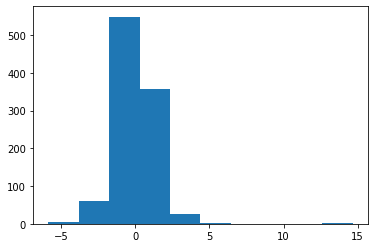

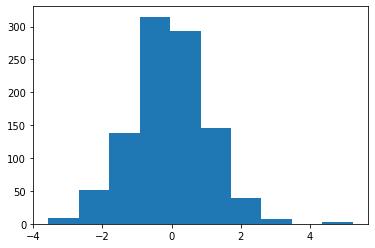

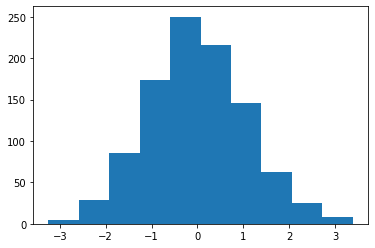

<IPython.core.display.Javascript object>

In [25]:
# set seed for reproducible random stuff
np.random.seed(42)

# Generate a t distribution with an np.random function
n = 1000
plt.hist(np.random.standard_t(df=5, size=n))
plt.show()

plt.hist(np.random.standard_t(df=10, size=n))
plt.show()

plt.hist(np.random.standard_t(df=100, size=n))
plt.show()

* What's the null hypothesis in a t-test?
* When do we reject this null hypothesis?

Below are the average heights (in cm) by sex in USA according to [this big ole report](https://www.cdc.gov/nchs/data/series/sr_03/sr03_039.pdf) that I really found from [this wikipedia page](https://en.wikipedia.org/wiki/Average_human_height_by_country); the info also gives the sample size and standard deviation.

* Generate random normal samples using this information.
* Plot overlaid histograms of these samples you generated.

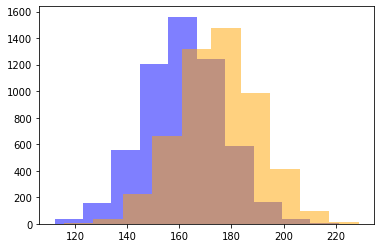

In [13]:
male_n = 5232
male_avg = 175.3
male_sd = 15.2

female_n = 5547
female_avg = 161.5
female_sd = 15.2

# Generate random normal samples using this information.
np.random.seed(42)
female_height = _____
male_height = _____

# Plot overlaid histograms of these samples you generated.
_____
_____
plt.show()

According to the histograms (and the average) men are taller.  Is this difference significant?

In [26]:
stats.ttest_ind(female_height, male_height)

Ttest_indResult(statistic=-46.343565222289186, pvalue=0.0)

<IPython.core.display.Javascript object>

What if we had biased samples?? What is a biased sample??

Let's say we took a random sample of women and only ended up with WNBA players (not likely with a random sample, but the beauty of randomness is that *anything* is possible, some things are just unlikely).  Below is the average height for WNBA players according to [reference.com](https://www.reference.com/world-view/average-height-wnba-player-a3cf4bccebffecfb); also is the number of WNBA players according to the [New York Times](https://www.nytimes.com/2018/05/05/sports/wnba-los-angeles-sparks.html).

Let's say our sample of men ended up with only marathon runners.  Below is the average height for top 100 male marathon runners according to [runnersworld.com](https://www.runnersworld.com/news/a20855134/great-marathoners-over-six-feet-tall-are-rare/).  

Use the same standard deviations from before and:
* generate some more normal distributions
* re-plot
* re-ttest

In [ ]:
wnba_avg = 180.3
wnba_n = 144

marathon_avg = 169.92
marathon_n = 100

# generate some more normal distributions

# re-plot

# re-test


We conclude the opposite! Kinda forced us into this.. but! This is the whole idea about the p-value and the typical 5% cutoff.  The p-value is trying to help us differentiate from results that occur purely from chance related to sampling.  AKA every p-value is trying to protect against the chance that you're comparing WNBA players and marathoners when you want to be comparing women and men.  AKA a p-value is the probability that random chance generated differences that you're seeing in the data.

When we reject the null at the 5% level we're still saying there's a 5% chance these results happened due to sampling bias.  Typically 5% is pretty good in practice; here we forced the issue and got a reallllly unlikely sample to happen randomly.

## Regression and t-tests!

So why are we talking about t-tests?  I thought this was a linear regression class?

This is how we test if a predictor is 'significant'.  In a business context maybe we discover that our company's number of hours worked isn't a significant predictor of success; with that information we could argue that taking next Monday off isn't such a bad thing.

Enough about stats and business, lets get back to some snails.

* With the imported abalone dataset
  * Use `Whole_Weight` and `Diameter` as the predictors and `Rings` as the target.
  * Build a regression model using `statsmodels`
  * Print the model summary
* Use the output to identify if any of the predictors are significant.  Which ones are if any? `____________`

In [27]:
cols = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole_Weight",
    "Shucked_Weight",
    "Visecra_Weight",
    "Shell_Weight",
    "Rings",
]
abalone = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/1GwCnxFT4Sd6iZDj07kNNhEREr7OJQnGvtxd67b5AMio/export?format=csv",
    names=cols,
)

<IPython.core.display.Javascript object>

In [19]:
# Use `Whole_Weight` and `Diameter` as the predictors
X = ____

# `Rings` as the target
y = ____


# Build a regression model using `statsmodels`
X_const = sm.add_constant(X)
lm_results = sm.OLS(y, X_const).fit()

# Print the model summary
lm_results.summary()

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     1031.
Date:                Tue, 07 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:22:06   Log-Likelihood:                -9977.6
No. Observations:                4177   AIC:                         1.996e+04
Df Residuals:                    4174   BIC:                         1.998e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.7254      0.286      9.535      0.000       2.165       3.286
Whole_Weight     0.3925      0.220      1.786      0.074      -0.038       0.823
Diameter        16.8749      1.086     15.541      0.000      14.746      19.004
==============================================================================
Omnibus:                     1406.407   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4665.317
Skew:                           1.707   Prob(JB):                         0.00
Kurtosis:                       6.892   Cond. No.                         39.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's rebuild our model and use an *interaction term* (\**gasp*\*)

* Create a new feature that captures the interaction between our current 2 predictors
* Rebuild the model and re-print the summary
* Interpret the t-tests for these coefficients

In [46]:
# Create a new feature that captures the interaction between our current 2 predictors
X["ww_d_interaction"] = _____

# Build a regression model using `statsmodels`
____

# Print the model summary
____

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     729.7
Date:                Tue, 31 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:52:29   Log-Likelihood:                -9935.6
No. Observations:                4177   AIC:                         1.988e+04
Df Residuals:                    4173   BIC:                         1.990e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.6674      0.283      9.423      0.000       2.112       3.222
Whole_Weight         7.3842      0.790      9.352      0.000       5.836       8.932
Diameter            13.0543      1.152     11.329      0.000      10.795      15.313
ww_d_interaction   -10.9069      1.184     -9.211      0.000     -13.228      -8.585
==============================================================================
Omnibus:                     1371.274   Durbin-Watson:                   0.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4486.551
Skew:                           1.667   Prob(JB):                         0.00
Kurtosis:                       6.830   Cond. No.                         57.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Wait, what did we just do?

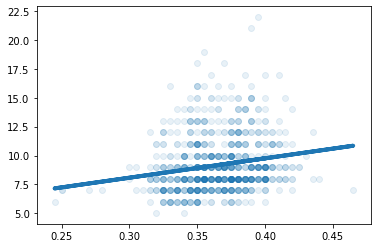

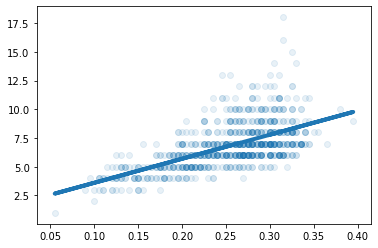

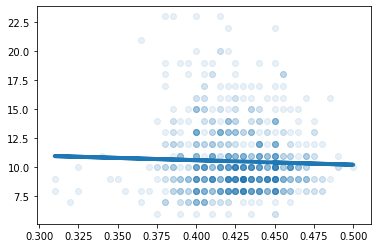

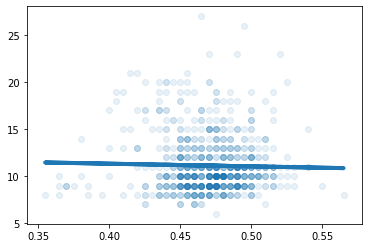

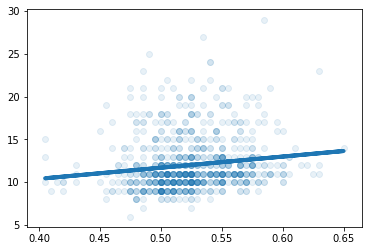

No handles with labels found to put in legend.


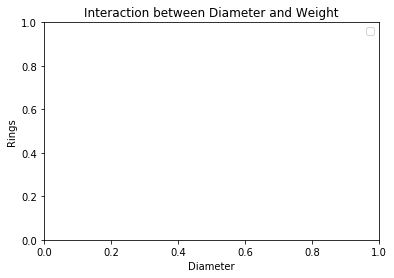

<IPython.core.display.Javascript object>

In [29]:
# its easier to see if we bin we'll bin weight and then a model
# for diameter when within each bin of weight
def bin_array(x, n_bins=5):
    percentiles = np.linspace(0, 100, n_bins + 1)[:-1]
    bins = np.percentile(x, percentiles)
    binned = np.digitize(x, bins)
    return binned


abalone["binned_weight"] = bin_array(abalone["Whole_Weight"])
for b in abalone["binned_weight"].unique():
    subset = abalone[abalone["binned_weight"] == b]

    # if we have only 1 row we wont fit a model
    if subset.shape[0] <= 1:
        continue

    X = subset["Diameter"]
    y = subset["Rings"]

    X_const = sm.add_constant(X)
    y_pred = sm.OLS(y, X_const).fit().predict()

    lab = f"Weight: Bin {b}"
    plt.plot(X, y_pred, label=lab, lw=4)
    ## (un)comment below to toggle plotting on same axes
#     plt.scatter(X, y, label=lab, alpha=0.1)
#     plt.show()


plt.xlabel("Diameter")
plt.ylabel("Rings")
plt.title("Interaction between Diameter and Weight")
plt.legend()
plt.show()

So what do we see here? How Diameter affects Rings depends on how heavy our snail is! When our snail is lighter a higher diameter means more Rings.  When we go up in weight we start to see this trend taper off, at a certain weight diameter starts to matter less for predicting rings! In other words the effects of diameter and weight interact with each other.